In [133]:
from numpy import *
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
%matplotlib inline
import matplotlib.pyplot as plt
from dmba import classificationSummary
from sklearn import linear_model
import seaborn as sns
import numpy as np




In [4]:
import os
os.getcwd()
os.chdir('C:\\Users\\Ken\\Desktop\\IT 483')

In [121]:
df = pd.read_csv('Insurance Data Set.csv')

print(df.head(3))

print(df.tail(3))

  Customer Identifier  Policy ID first_name last_name                 email  \
0              1gMa51    2997410       Lyon     Alsop   lalsop0@gizmodo.com   
1              2gFa82    3449970      Fleur     Grier   fgrier1@4shared.com   
2              3gFa22    4468891      Kiley    Gailor  kgailor2@skyrock.com   

     Model    Make  Model Year                Vin      Color Prior Accident?  \
0    280ZX  Nissan        1979  3C3CFFDR8DT469454       Teal              No   
1  Clubman    MINI        2011  2C3CCADG3EH798938    Crimson              No   
2      626   Mazda        1992  3FADP4AJ2DM002627  Goldenrod              No   

            City           State  Deductible  Insurance Year  Annual Premium  
0    Spring Hill         Florida         750            2016           468.0  
1        El Paso           Texas        1250            2016           364.0  
2  Winston Salem  North Carolina        2500            2016           122.4  
     Customer Identifier   Policy ID first_nam

In [135]:
df['Make'].value_counts()

Ford          585
Chevrolet     418
Toyota        340
GMC           256
Dodge         235
             ... 
Peugeot         3
Aptera          3
McLaren         3
Studebaker      3
Shelby          2
Name: Make, Length: 62, dtype: int64

In [137]:
df['Make'].value_counts().div(5882).mul(100)

Ford          9.945597
Chevrolet     7.106426
Toyota        5.780347
GMC           4.352261
Dodge         3.995240
                ...   
Peugeot       0.051003
Aptera        0.051003
McLaren       0.051003
Studebaker    0.051003
Shelby        0.034002
Name: Make, Length: 62, dtype: float64

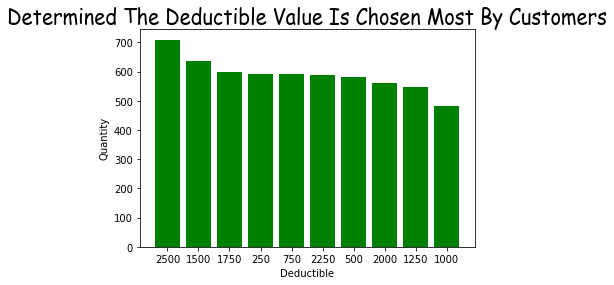

In [170]:
bar_df = df['Deductible'].value_counts().to_frame().reset_index()
bar_df.columns = ['Deductible', 'Quantity']

bar_df = bar_df.astype({'Deductible': str})

plt.bar(bar_df['Deductible'], bar_df['Quantity'], color='green')

plt.title('Determined The Deductible Value Is Chosen Most By Customers', fontdict={'fontname': 'Comic sans MS', 'fontsize': 20})

plt.xlabel('Deductible')
plt.ylabel('Quantity')

plt.show()

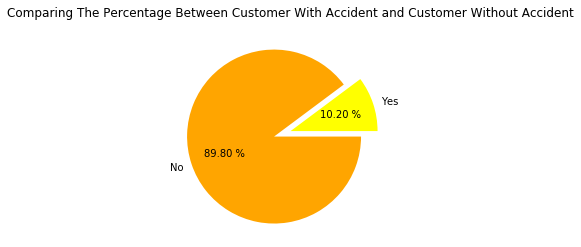

In [172]:
Yes = df.loc[df['Prior Accident?'] == 'Yes'].count()[0]
No = df.loc[df['Prior Accident?'] == 'No'].count()[0]

labels = ['Yes', 'No']
colors = ['Yellow', 'Orange']
explode = (0, .2)

plt.pie([Yes, No], labels=labels, colors=colors, autopct='%.2f %%', explode=explode)
plt.title('Comparing The Percentage Between Customer With Accident and Customer Without Accident')

plt.show()

In [220]:
ded1_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 250)]
number_of_rows = len(ded1_df)
print(number_of_rows)

48


In [221]:
ded2_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 500)]
number_of_rows = len(ded2_df)
print(number_of_rows)

56


In [222]:
ded3_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 750)]
number_of_rows = len(ded3_df)
print(number_of_rows)

54


In [223]:
ded4_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 1000)]
number_of_rows = len(ded4_df)
print(number_of_rows)

56


In [224]:
ded5_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 1250)]
number_of_rows = len(ded5_df)
print(number_of_rows)

52


In [225]:
ded6_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 1500)]
number_of_rows = len(ded6_df)
print(number_of_rows)

70


In [226]:
ded7_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 1750)]
number_of_rows = len(ded7_df)
print(number_of_rows)

69


In [227]:
ded8_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 2000)]
number_of_rows = len(ded8_df)
print(number_of_rows)

51


In [228]:
ded9_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 2250)]
number_of_rows = len(ded9_df)
print(number_of_rows)

57


In [229]:
ded10_df = df.loc[(df['Prior Accident?'] == 'Yes') & (df['Deductible'] == 2500)]
number_of_rows = len(ded10_df)
print(number_of_rows)

87


In [236]:
mean1 = ded1_df.iloc[:48]['Annual Premium'].mean()
mean2 = ded2_df.iloc[:48]['Annual Premium'].mean()
mean3 = ded3_df.iloc[:48]['Annual Premium'].mean()
mean4 = ded4_df.iloc[:48]['Annual Premium'].mean()
mean5 = ded5_df.iloc[:48]['Annual Premium'].mean()
mean6 = ded6_df.iloc[:48]['Annual Premium'].mean()
mean7 = ded7_df.iloc[:48]['Annual Premium'].mean()
mean8 = ded8_df.iloc[:48]['Annual Premium'].mean()
mean9 = ded9_df.iloc[:48]['Annual Premium'].mean()
mean10 = ded10_df.iloc[:48]['Annual Premium'].mean()

In [237]:
new_df = pd.DataFrame({"Value of Deductible": ["250", "500", "750", "1000", "1250", "1500", "1750", "2000", "2250", "2500"], "Mean of Annual Premium": [mean1, mean2, mean3, mean4, mean5, mean6, mean7, mean8, mean9, mean10]})
new_df

,Value of Deductible,Mean of Annual Premium
0,250,514.810926
1,500,558.945950
2,750,524.176824
3,1000,470.343356
4,1250,411.882871
5,1500,398.467208
6,1750,357.230729
7,2000,360.015887
8,2250,341.298071
9,2500,258.189762
